# MNIST SVD Classification
#### Author(s): Daniel Yan
#### Email: daniel.yan@vanderbilt.edu

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


# Load Data

Load in Keras dataset

In [2]:
# Load in mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape to each image to a row vector
x_train_rowvector = np.reshape(x_train, (-1, 28*28))
# Take small sample of 2000
x_train_rowvector_sample2000 = x_train_rowvector[:2000, :]
y_train_sample2000 = y_train[:2000]

# Visualize Examples

Label:  5


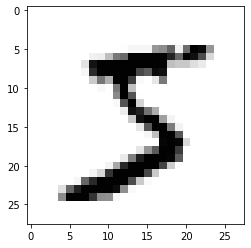

Label:  0


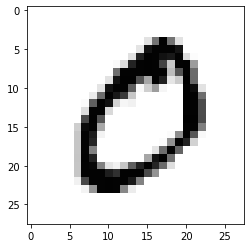

Label:  4


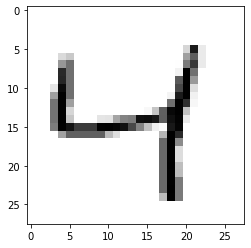

Label:  1


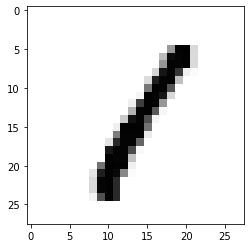

Label:  9


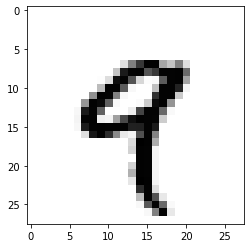

In [3]:
# Visualize a few samples
for i in range(5):
    print("Label: ", y_train[i])
    image = x_train_rowvector[i, :]
    plt.imshow(image.reshape(28, 28), cmap="Greys")
    plt.show()
    plt.close()

# PCA Visualization
Credits: https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

In [4]:
# Calculate the covariance matrix
covariance = np.cov(x_train_rowvector_sample2000, rowvar=False)

In [5]:
# Calculate the eigenvalues and the eigenvectors for the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)

In [6]:
# Get the real part of the eigenvalues and eigenvectors only
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

In [7]:
# Project original data onto eigenvectors
pca = np.dot(x_train_rowvector_sample2000, eigenvectors)
# Get only the first two columns for the first two principal components
pca = pca[:, 0:2]

Sort by label

In [8]:
pca_list= [0] * 10
y_list = [0] * 10
for i in range(10):
    pca_list[i] = (pca[y_train_sample2000 == i])
    y_list[i] = (y_train_sample2000[y_train_sample2000 == i])

Plot each label separately on graph

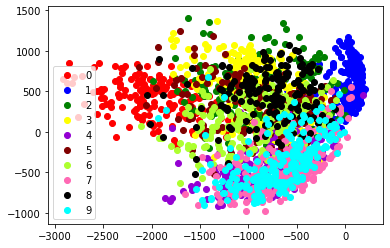

In [9]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    pca_current_label = pca_list[i]
    ax.scatter(pca_current_label[:, 0], pca_current_label[:, 1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()                   

Calculate and plot the mean for each digit in PCA coordinates

In [45]:
pca_mean_list = [0] * 10
for i in range(10): 
    pca_mean_list[i] = np.mean(pca_list[i], axis=0)

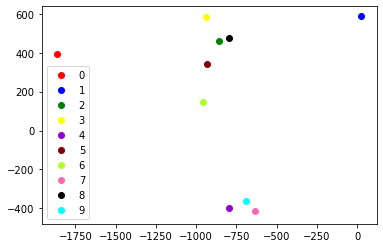

In [46]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    pca_current_label = pca_mean_list[i]
    ax.scatter(pca_current_label[0], pca_current_label[1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  


# SVD Visualization
Compare the PCA visualization with SVD dimensionality reduction

Calculate SVD and use dimensionality reduction to get down to 2 coordinates

In [31]:
# Calculate u, s, v
u, s, v = np.linalg.svd(x_train_rowvector_sample2000.T, full_matrices=False)
# Set all singular values greater than the first two to 0
for i in range(2, s.shape[0]):
    s[i] = 0
# Calculate the reduced dimensions with svd
svd_cords = np.diag(s) @ v

Sort by label

In [32]:
svd_list= [0] * 10
for i in range(10):
    svd_list[i] = (svd_cords.T[y_train_sample2000 == i])

Plot the SVD coordinates

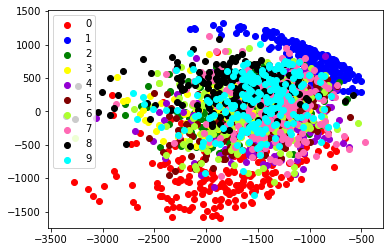

In [33]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    svd_current_label = svd_list[i]
    ax.scatter(svd_current_label[:, 0], svd_current_label[:, 1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  

Calculate and plot the mean for each digit in SVD coordinates


In [40]:
svd_mean_list = [0] * 10
for i in range(10): 
    svd_mean_list[i] = np.mean(svd_list[i], axis=0)

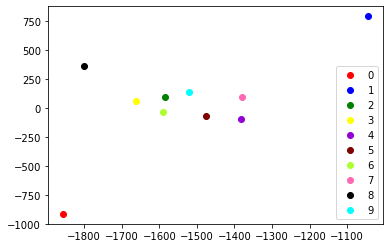

In [43]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    svd_current_label = svd_mean_list[i]
    ax.scatter(svd_current_label[0], svd_current_label[1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  